### defines

In [1]:
import numpy as np; print('numpy:', np.__version__)
import scipy as sp; print('scipy:', sp.__version__)
from scipy import fft
import matplotlib as mpl; print('matplotlib:', mpl.__version__)
from matplotlib import pyplot as plt
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = plt.rcParams['axes.linewidth']
plt.rcParams['ytick.major.width'] = plt.rcParams['axes.linewidth']
plt.rcParams['figure.figsize'] = (5.8, 4.1)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 12
import itertools

numpy: 1.22.3
scipy: 1.8.0
matplotlib: 3.5.1


In [2]:
## fft plot series
def plot_fft2d(fk):
    fig, ax = plt.subplots()
    pc = ax.imshow(fk, norm=mpl.colors.LogNorm())
    fig.colorbar(pc)
    ax.invert_yaxis()
    ax.set_xlim(0, fk.shape[0]//2)
    ax.set_ylim(0, fk.shape[1]//2)
    ax.set_xlabel(r'$k_x$')
    ax.set_ylabel(r'$k_y$')
    plt.show(fig)
    plt.close(fig)
    
def plot_fft2d_arg(fk):
    fig, ax = plt.subplots()
    pc = ax.imshow(fk, vmin=0., cmap='Blues')
    fig.colorbar(pc)
    ax.invert_yaxis()
    ax.set_xlim(0, fk.shape[0]//2)
    ax.set_ylim(0, fk.shape[1]//2)
    ax.set_xlabel(r'$k_x$')
    ax.set_ylabel(r'$k_y$')
    fig.savefig('fft_arg_2d.pdf')
    plt.show(fig)
    plt.close(fig)
    
def plot_fft_spectrum(k, ek, label='energy spectrum'):
    ext = False
    fig, ax = plt.subplots()
    ax.plot(k, ek, label=label)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1e-8, 1e-1)
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'$d_E(k)$')
    ax.legend()

In [3]:
# conditions
result_dir = 'result/230207_fix_rloc_mat_betaopt'
%mkdir -p 'result/230207_fix_rloc_mat_betaopt'
def ifilename(prefix, t, v):
    return f'{prefix}/{v}_step{t:010d}.dat'

nx, ny = 256, 256
step = 2000
dtype = np.float32

err_rho = 0.01
err_u = 0.1
beta = '_opt'

## comment 0425: rescale $u_0$ as per RMS. this is $u_0$ = $u_0^old / 0.6$
## comment 1006: factor is readjusted so that RMS=1, u0=1
u0_factor = 1

In [4]:
# error fft
def get_uv(prefix, step=step, name=''):
    with open(ifilename(prefix, step, name+'u')) as f:
        u = u0_factor * np.fromfile(f, dtype=dtype, sep='').reshape(ny, nx)
    with open(ifilename(prefix, step, name+'v')) as f:
        v = u0_factor * np.fromfile(f, dtype=dtype, sep='').reshape(ny, nx)
    return u, v
def calc_fft_energy(u, v):
    fftu = fft.fft2(u) / nx / ny
    fftv = fft.fft2(v) / nx / ny
    return (fftu**2 + fftv**2)/2
def calc_fft_energy_error(left, right, right_name='', step=step):
    ul, vl = get_uv(left, step)
    ur, vr = get_uv(right, step, name=right_name)
    return calc_fft_energy(ul-ur, vl-vr)

def calc_fft_energy_spectrum(ffte):
    kmax = nx//2
    krange = np.arange(kmax + 1)
    ek = np.zeros(len(krange))
    for i,j in itertools.product(krange, krange):
        k = int(np.sqrt(i**2 + j**2) + 0.5)
        if k <= kmax:
            ek[k] += np.abs(ffte[i,j])
    return krange, ek

def calc_fft_energy_spectrum_arg(ffte):
    kmax = nx//2
    krange = np.arange(kmax + 1)
    ek = np.zeros(len(krange))
    kcnt = np.zeros(len(krange))
    for i,j in itertools.product(krange, krange):
        k = int(np.sqrt(i**2 + j**2) + 0.5)
        if k <= kmax:
            ek[k] += ffte[i,j]
            kcnt[k] = kcnt[k] + 1
    for k in krange:
        ek[k] /= kcnt[k]
    return krange, ek

### plot kx-ky, ensemble, temporal statistics

#### plot argerr

.
n_files: 126
 letkf:     20
 letkf:     41
 letkf:     62
 letkf:     83
 letkf:    104
 letkf:    125
 nudging:    146

output: result/230207_fix_rloc_mat_betaopt/fig/fft_argerrwo_obs_ens_64_xyprune_1_2_4_8_16_32.pdf


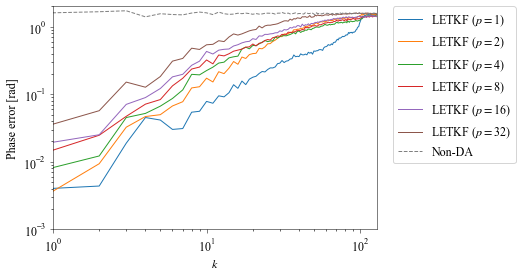

n_files: 63
 letkf:     20
 letkf:     41
 letkf:     62
 nudging:     83

output: result/230207_fix_rloc_mat_betaopt/fig/fft_argerrwo_obs_ens_4_16_64_xyprune_4.pdf


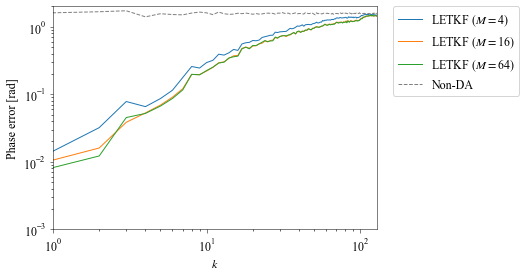

n_files: 63
 letkf:     20
 letkf:     41
 letkf:     62
 nudging:     83

output: result/230207_fix_rloc_mat_betaopt/fig/fft_argerrwo_obs_ens_4_16_64_xyprune_8.pdf


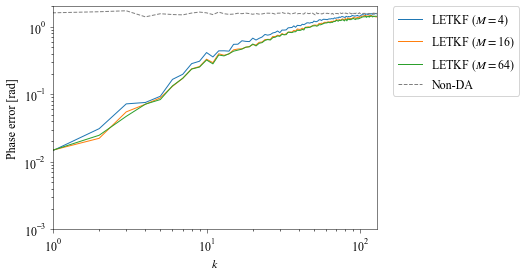

n_files: 63
 letkf:     20
 letkf:     41
 letkf:     62
 nudging:     83

output: result/230207_fix_rloc_mat_betaopt/fig/fft_argerrwo_obs_ens_4_16_64_xyprune_1.pdf


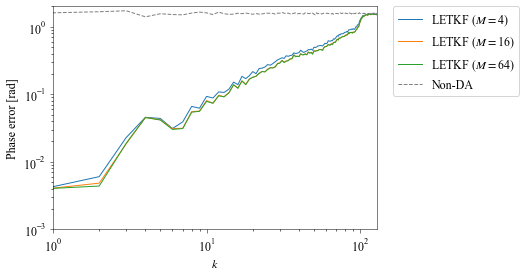

n_files: 63
 letkf:     20
 letkf:     41
 letkf:     62
 nudging:     83

output: result/230207_fix_rloc_mat_betaopt/fig/fft_argerrwo_obs_ens_4_16_64_xyprune_2.pdf


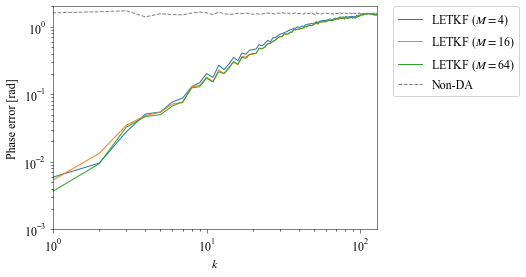

n_files: 63
 letkf:     20
 letkf:     41
 letkf:     62
 nudging:     83

output: result/230207_fix_rloc_mat_betaopt/fig/fft_argerrwo_obs_ens_4_16_64_xyprune_16.pdf


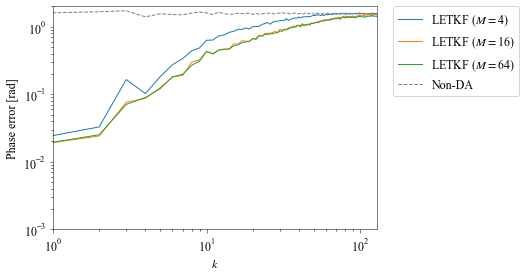

CPU times: user 7min 25s, sys: 4.91 s, total: 7min 30s
Wall time: 7min 30s


In [5]:
%%time

print('.')

def argerr_plot(*, steps, nee, pp, is_alpha, is_color, show_nudging=False, show_noda=True, show_obs=True):
    err_rho=0.01
    err_u=0.1
    beta='_opt'
    
    fig, ax = plt.subplots()
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'Phase error [rad]')
    ax.set_xlim(1,128)
    ax.set_ylim(1e-3,2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    print('n_files:', len(steps) * len(nee) * len(pp))
    cnt = 0
    for ne, p in itertools.product(nee, pp):
        prefix = f'{result_dir}/ens{ne}/xyprune{p}/errrho_{err_rho}_erru{err_u}/beta{beta}'
        k = None
        ekk = [] # letkf
        #for i, step in itertools.product(range(ne), steps):
        for step in steps:
            print(f'\r letkf: {cnt:6d}', end='', flush=True)
            cnt += 1
            ekt = calc_fft_energy(*get_uv(f'{prefix}/io_noda/nature/ens0000', step=step))
            #ekc = calc_fft_energy(*get_uv(f'{prefix}/io_letkf/calc/ens{i:04d}', step=step))
            ekc = calc_fft_energy(*get_uv(f'{prefix}/io_letkf/calc', name='ens_mean_', step=step))
            ek_abserr = np.abs(np.abs(ekc) - np.abs(ekt))
            ek_argerr = np.angle(ekc) - np.angle(ekt)
            minarg = lambda a: np.min([np.abs(a - p) for p in [0, -2.*np.pi, 2.*np.pi]])
            ek_argerr = np.vectorize(minarg) (ek_argerr)
            k, ek = calc_fft_energy_spectrum_arg(ek_argerr)
            ekk.append(ek)
        print()
        alpha = 0.5 + 0.5*np.log2(p)/np.log2(np.max(pp)) if is_alpha else 1
        color = None if is_color else 'C2'
        if len(pp) > 1 and len(nee) > 1:
            label = fr'LETKF ($M=${ne}, $p=${p})'
        elif len(pp) > 1:
            label = fr'LETKF ($p=${p})'
        elif len(nee) > 1:
            label = fr'LETKF ($M=${ne})'
        else:
            label = 'LETKF'
        ax.plot(k, np.mean(ekk, axis=0), label=label, lw=1, color=color, alpha=alpha)
        
    if show_nudging or show_noda:
        p=1 # for observation
        prefix = f'{result_dir}/ens{ne}/xyprune{p}/errrho_{err_rho}_erru{err_u}/beta{beta}'
        ekn = [] # nudging
        ekd = [] # no-DA
        eko = [] # observation
        for step in steps:
            print(f'\r nudging: {cnt:6d}', end='', flush=True)
            cnt += 1
            ekt = calc_fft_energy(*get_uv(f'{prefix}/io_noda/nature/ens0000', step=step))
            ## nudging
            ekc = calc_fft_energy(*get_uv(f'{prefix}/io_letkf/calc/ens0000', step=step))
            ek_abserr = np.abs(np.abs(ekc) - np.abs(ekt))
            ek_argerr = np.angle(ekc) - np.angle(ekt)
            minarg = lambda a: np.min([np.abs(a - p) for p in [0, -2.*np.pi, 2.*np.pi]])
            ek_argerr = np.vectorize(minarg) (ek_argerr)
            k, ek = calc_fft_energy_spectrum_arg(ek_argerr)
            ekn.append(ek)
            ## noda
            ekc = calc_fft_energy(*get_uv(f'{prefix}/io_noda/calc/ens0000', step=step))
            ek_abserr = np.abs(np.abs(ekc) - np.abs(ekt))
            ek_argerr = np.angle(ekc) - np.angle(ekt)
            minarg = lambda a: np.min([np.abs(a - p) for p in [0, -2.*np.pi, 2.*np.pi]])
            ek_argerr = np.vectorize(minarg) (ek_argerr)
            k, ek = calc_fft_energy_spectrum_arg(ek_argerr)
            ekd.append(ek)
            ## obs
            ekc = calc_fft_energy(*get_uv(f'{prefix}/io_noda/observed/ens0000', step=step))
            ek_abserr = np.abs(np.abs(ekc) - np.abs(ekt))
            ek_argerr = np.angle(ekc) - np.angle(ekt)
            minarg = lambda a: np.min([np.abs(a - p) for p in [0, -2.*np.pi, 2.*np.pi]])
            ek_argerr = np.vectorize(minarg) (ek_argerr)
            k, ek = calc_fft_energy_spectrum_arg(ek_argerr)
            eko.append(ek)
            
        print()
        if show_nudging:
            alpha = 0.5 + 0.5*np.log2(p)/np.log2(np.max(pp)) if is_alpha else 1
            color = 'C6'
            ax.plot(k, np.mean(ekn, axis=0), label=fr'Nudging', lw=1, color=color, alpha=alpha)
        if show_obs:
            if len(pp) == 1 and pp[0] == 1:
                label = 'Observation'
            else:
                label=fr'Obsrvation ($p$=1)'
            ax.plot(k, np.mean(eko, axis=0), label=label, lw=1, color='k', ls=':')
        if show_noda:
            ax.plot(k, np.mean(ekd, axis=0), label=fr'Non-DA', lw=1, color='gray', ls='--')
            
    print()

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    fname = f'{result_dir}/fig/fft_argerr'
    fname += '_w_obs' if show_obs else 'wo_obs'
    fname += '_ens'
    for ne in nee:
        fname += f'_{ne}'
    fname += '_xyprune'
    for p in pp:
        fname += f'_{p}'
    fname += '.pdf'
    print('output:', fname)
    fig.savefig(fname, bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)

## PRF2022 fig. 10
ppkwargs = dict(steps = range(1800,2010,10), is_alpha=False, is_color=True, show_obs=False,)
argerr_plot(**ppkwargs, nee=[64], pp=[1,2,4,8,16,32,])

## PRF2022 fig. 12
nnkwargs = dict(steps = range(1800,2010,10), is_alpha=False, is_color=True, show_obs=False, show_nudging=False)
argerr_plot(**nnkwargs, nee=[4,16,64], pp=[4])
argerr_plot(**nnkwargs, nee=[4,16,64], pp=[8])
argerr_plot(**nnkwargs, nee=[4,16,64], pp=[1])
argerr_plot(**nnkwargs, nee=[4,16,64], pp=[2])
argerr_plot(**nnkwargs, nee=[4,16,64], pp=[16])

## debug;; rel. PRF2022 fig. 5
#argerr_plot(steps=range(1800,2010,10), nee=[16], pp=[1], show_nudging=True, is_color=True, is_alpha=False)

#### plot spectrum

.
n_files: 9408
nature:   2000 /   2000
nudging p1:   2000 /   2000
nudging p2:   2000 /   2000
nudging p4:   2000 /   2000
nudging p8:   2000 /   2000
nudging p16:   2000 /   2000
nudging p32:   2000 /   2000
nudging p64:   2000 /   2000

output: result/230207_fix_rloc_mat_betaopt/fig/fft_spectrum_nudging_xyprune_1_2_4_8_16_32_64.pdf


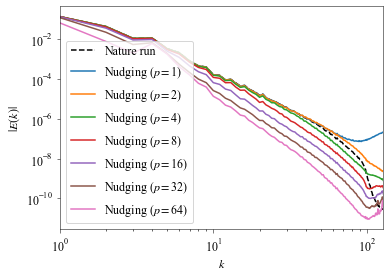

n_files: 9408
nature:   2000 /   2000
 letkf M64 p1:   2000: 63 /   2000: 64
 letkf M64 p2:   2000: 63 /   2000: 64
 letkf M64 p4:   2000: 63 /   2000: 64
 letkf M64 p8:   2000: 63 /   2000: 64
 letkf M64 p16:   2000: 63 /   2000: 64
 letkf M64 p32:   2000: 63 /   2000: 64
 letkf M64 p64:   2000: 63 /   2000: 64

output: result/230207_fix_rloc_mat_betaopt/fig/fft_spectrum_letkf_ens_64_xyprune_1_2_4_8_16_32_64.pdf


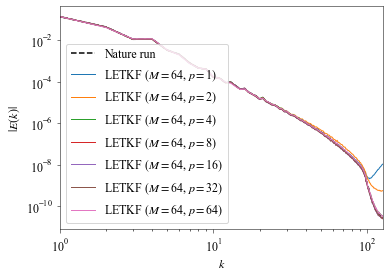

In [19]:
print('.')

def spectrum_plot(*, steps, nee, pp,
                  is_color=True, # automatic coloring (i.e. C0, C1, ...)
                  is_alpha=False, show_letkf=True, show_nudging=True, show_observe=False, 
                  letkf_ind=True, # true: ens mean of fft of each member, false: fft of ens mean
                  legendkw=dict(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
                 ):
    fig, ax = plt.subplots()
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'$|E(k)|$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1,128)
    #ax.set_ylim(1e-10,1)
    #ax.set_yticks(10. ** np.arange(-7,1))
    
    n_files = len(steps) * np.sum(nee) * len(pp)
    print('n_files:', n_files)

    ## /nature
    prefix = f'{result_dir}/ens{nee[0]}/xyprune{pp[0]}/errrho_{err_rho}_erru{err_u}/beta{beta}'
    ekkt = []
    for step in steps:
        print(f'\rnature: {step:6d} / {np.max(steps):6d}', end='', flush=True)
        k, ekt = calc_fft_energy_spectrum(calc_fft_energy(*get_uv(f'{prefix}/io_noda/nature/ens0000', step=step)))
        ekkt.append(ekt)
    print()
    ekt = np.mean(ekkt, axis=0)
    ax.plot(k, ekt, label='Nature run', color='k', ls='--')

    ## /observation
    if show_observe:
        prefix = f'{result_dir}/ens{nee[0]}/xyprune{pp[0]}/errrho_{err_rho}_erru{err_u}/beta{beta}'
        ekko = []
        for step in steps:
            print(f'\robservation: {step:6d} / {np.max(steps):6d}', end='', flush=True)
            k, eko = calc_fft_energy_spectrum(calc_fft_energy(*get_uv(f'{prefix}/io_noda/observed/ens0000', step=step)))
            ekko.append(eko)
        eko = np.mean(ekko, axis=0)

        if len(pp) == 1 and pp[0] == 1:
            label = 'Observation'
        else:
            label=fr'Obsrvation ($p$=1)'
        ax.plot(k, eko, label=label, color='k', ls=':')
                

    ## pp 
    for ip, p in enumerate(pp):
        ## /ensemble
        if show_letkf:
            for ne in nee:
                prefix = f'{result_dir}/ens{ne}/xyprune{p}/errrho_{err_rho}_erru{err_u}/beta{beta}'
                ekkc = []
                for step in steps:
                    if letkf_ind:
                        for i in range(ne):
                            print(f'\r letkf M{ne} p{p}: {step:6d}:{i:3d} / {np.max(steps):6d}:{ne:3d}', end='', flush=True)
                            k, ekc = calc_fft_energy_spectrum(
                                calc_fft_energy(
                                    *get_uv(f'{prefix}/io_letkf/calc/ens{i:04d}', step=step)
                                )
                            )
                            ekkc.append(ekc)
                    else:
                        print(f'\rletkf {ne}: {step:6d} / {np.max(steps):6d}', end='', flush=True)
                        k, ekc = calc_fft_energy_spectrum(
                        calc_fft_energy(
                            *get_uv(f'{prefix}/io_letkf/calc', name='ens_mean_', step=step)
                            )
                        )
                        ekkc.append(ekc)
                print()
                ekc = np.mean(ekkc, axis=0)
                alpha = 0.5 + 0.5*np.log2(p)/np.log2(np.max(pp)) if is_alpha else 1
                color = None if is_color else 'C2'
                lw = 1
                if len(pp) == 1:
                    label = fr'LETKF ($M=${ne})'
                else:
                    label = fr'LETKF ($M=${ne}, $p=${p})'
                ax.plot(k, ekc, label=label, alpha=alpha, lw=lw, color=color)
                
        ## /nudging
        if show_nudging:
            prefix = f'{result_dir}/ens{nee[0]}/xyprune{p}/errrho_{err_rho}_erru{err_u}/beta{beta}'
            ekkn = []
            for step in steps:
                print(f'\rnudging p{p}: {step:6d} / {np.max(steps):6d}', end='', flush=True)
                k, ekn = calc_fft_energy_spectrum(calc_fft_energy(*get_uv(f'{prefix}/io_nud/calc/ens0000', step=step)))
                ekkn.append(ekn)
            print()
            ekn = np.mean(ekkn, axis=0)
            alpha = 0.5 + 0.5*np.log2(p)/np.log2(np.max(pp)) if is_alpha else 1
            if not is_color and p == pp[0]:
                color = 'C6'
                if p == pp[-1]:
                    ax.plot(k, ekn, label=fr'Nudging', color=color, alpha=alpha)
                else:
                    ax.plot(k, ekn, color=color, alpha=alpha)
            else:
                ax.plot(k, ekn, label=fr'Nudging ($p=${p})', color=None, alpha=alpha)
            
    print()

    ax.legend(**legendkw)
    fname = f'{result_dir}/fig/fft_spectrum'
    if show_letkf:
        fname = fname + '_letkf_ens'
        for ne in nee:
            fname = fname + f'_{ne}'
    if show_nudging:
        fname = fname + '_nudging'
    fname = fname + '_xyprune'
    for p in pp:
        fname = fname + f'_{p}'
    fname = fname + '.pdf'
        
    print('output:', fname)
    fig.savefig(fname, bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)

steps = range(1800,2010,10)

### PRF2022 fig. 5
#spectrum_plot(steps=steps, nee=[64, 16, 4], pp=[1], show_nudging=True, is_color=True, show_observe=True, letkf_ind=True)
#spectrum_plot(steps=steps, nee=[64, 16, 4], pp=[4], show_nudging=True, is_color=True, show_observe=True, letkf_ind=True)
#spectrum_plot(steps=steps, nee=[16], pp=[1], is_color=True, show_observe=True, letkf_ind=False) ## debug
#
### PRF2022 fig. 8
#spectrum_plot(steps=steps, nee=[64], pp=[32], is_color=False)
#
### PRF2022 fig. 10
#spectrum_plot(steps=steps, nee=[64], pp=[1,2,4,8,16,32,], show_nudging=False, show_observe=False)
#
### PRF2022 fig. 12
#spectrum_plot(steps=steps, nee=[4,16,64], pp=[1], show_nudging=False)
#spectrum_plot(steps=steps, nee=[4,16,64], pp=[2], show_nudging=False)
#spectrum_plot(steps=steps, nee=[4,16,64], pp=[16], show_nudging=False)
#spectrum_plot(steps=steps, nee=[4,16,64], pp=[4], show_nudging=False)
#spectrum_plot(steps=steps, nee=[4,16,64], pp=[8], show_nudging=False)

## PRF2023, fft_p32
legendkw = dict(loc='lower left')
spectrum_plot(steps=steps, nee=[64], pp=[1,2,4,8,16,32,64], show_letkf=False, show_nudging=True, legendkw=legendkw)
spectrum_plot(steps=steps, nee=[64], pp=[1,2,4,8,16,32,64], show_letkf=True, show_nudging=False, legendkw=legendkw)